# Исследование данных сервиса аренды самокатов

В этом исследовании мы проанализируем данные популярного сервиса аренды самокатов GoFast. В нашем распоряжении - данные о некоторых пользователях из нескольких городов, а также об их поездках:

* датасет "Пользователи" — users_go.csv — со следующими столбцами:
    + user_id — уникальный идентификатор пользователя
    + name — имя пользователя
    + age — возраст
    + city — город
    + subscription_type — тип подписки (free, ultra)

* датасет "Поездки" — rides_go.csv — со следующими столбцами:
    + user_id — уникальный идентификатор пользователя
    + distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
    + duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    + date — дата совершения поездки

* датасет "Подписки" — subscriptions_go.csv — со следующими столбцами:
    + subscription_type	тип подписки
    + minute_price	стоимость одной минуты поездки по данной подписке
    + start_ride_price	стоимость начала поездки
    + subscription_fee	стоимость ежемесячного платежа

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    + абонентская плата отсутствует;
    + стоимость одной минуты поездки — 8 рублей;
    + стоимость старта (начала поездки) — 50 рублей;
    
* с подпиской Ultra
    + абонентская плата — 199 рублей в месяц;
    + стоимость одной минуты поездки — 6 рублей;
    + стоимость старта — бесплатно.    
    
Мы изучим исходные данные, проведём предобработку данных, проанализируем их и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.    

In [ ]:
import pandas as pd #импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

### Шаг 1. Загрузка данных

Считаем исходные файлы и изучим их:

In [ ]:
users = pd.read_csv('/datasets/users_go.csv') #считаем cvs-файл с информацией о пользователях и сохраним его в переменную users

In [ ]:
rides = pd.read_csv('/datasets/rides_go.csv') #считаем cvs-файл с информацией о поездках и сохраним его в переменную rides

In [ ]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') #считаем cvs-файл с информацией о подписках
#и сохраним его в переменную subscriptions

In [ ]:
users.head(15) #выведем первые 15 строк датафрейма с информацией о пользователях

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [ ]:
rides.head(15) #выведем первые 15 строк датафрейма с информацией о поездках

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [ ]:
subscriptions #выведем датафрейм с информацией о подписках

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
users.info() #выведем и изучим общую информацию о датафрейме с информацией о пользователях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
rides.info() #выведем и изучим общую информацию о датафрейме с информацией о поездках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
subscriptions.info() #выведем и изучим общую информацию о датафрейме с информацией о подписках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**
- мы считали cvs-файлы с необходимой информацией о пользователях, поездках и подписках;
- вывели первые строки датафреймов и изучили, какие столбцы и какие данные в них содержатся;
- изучили общую информацию о датафреймах и узнали, в каком формате в них записаны данные.

### Шаг 2. Предобработка данных

#### Приведём значения в столбце date в датафрейме rides к типу datetime для удобства работы:

In [ ]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') #меняем тип на datetime
rides.info() #и проверяем, что изменения прошли успешно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Cоздадим новый столбец month с номером месяца на основе столбца date:

In [ ]:
rides['month'] = rides['date'].dt.month #создаём новый столбец с номером месяца
rides.head() #и проверяем, что изменения прошли успешно

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [ ]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [ ]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

У нас есть данные за весь 2021 год.

#### Проверим наличие пропущенных значений и дубликатов в датафреймах:

In [ ]:
users.isna().sum() #узнаем количество пропусков в каждом столбце датафрейма users

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков нет.

In [ ]:
users.duplicated().sum() #теперь узнаем количество явных дубликатов в этом датафрейме

31

In [ ]:
users = users.drop_duplicates() #устраняем явные дубликаты
users.duplicated().sum() #и проверяем, что изменения прошли успешно

0

Теперь явных дубликатов нет. Посмотрим, есть ли неявные дубликаты - неправильно записанные имена или названия городов.

In [ ]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [ ]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В этих столбцах неявных дубликатов нет, можно двигаться дальше.

In [ ]:
rides.isna().sum() #узнаем количество пропусков в каждом столбце датафрейма rides

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропусков также нет.

In [ ]:
rides.duplicated().sum() #теперь узнаем количество явных дубликатов в этом датафрейме

0

И явных дубликатов тоже нет. Неявных дубликатов в этом датафрейме не может быть, так как здесь нет столбцов с текстовым типом данных.
В последнем датафрейме subscriptions всего две строки с информацией о тарифах - мы видели этот датафрейм целиком в шаге 1 и убедились, что там нет ни пропусков, ни дубликатов.

**Вывод:**
- мы изменили тип данных в столбце date в датафрейме rides на datetime для удобства работы;
- создали новый столбец month с номером месяца на основе столбца date;
- посмотрели, за какой срок у нас есть данные;
- обработали неявные дубликаты;
- убедились в отсутствии пропусков, явных и неявных дубликатов во всех датафреймах после обработки.

### Шаг 3. Исследовательский анализ данных

В этом шаге мы опишем и визуализируем общую информацию о пользователях и поездках.

#### Частота встречаемости городов

In [ ]:
#users['city'].hist(bins=8, figsize=(10, 7)) #построим гистограмму для столбца city с названиями городов датафрейма users
#plt.title('Частота встречаемости городов')
#plt.xlabel('Название города')
#plt.ylabel('Частота')
#plt.show()

In [ ]:
users['city'].value_counts().sort_values(ascending=False) #выведем информацию о частоте, с которой встречаются города

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

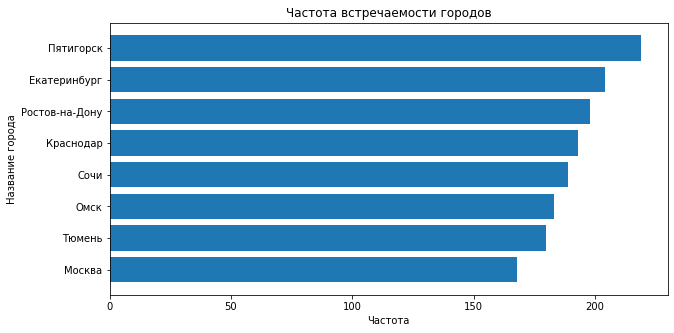

In [ ]:
#создадим переменные со списками городов и того, как часто они встречаются
#и построим горизонтальную столбчатую диаграмму
cities = ['Москва', 'Тюмень', 'Омск', 'Сочи', 'Краснодар', 'Ростов-на-Дону', 'Екатеринбург', 'Пятигорск']
amt = [168, 180, 183, 189, 193, 198, 204, 219]
plt.figure(figsize=(10, 5))
plt.barh(cities, amt)
plt.title('Частота встречаемости городов')
plt.xlabel('Частота')
plt.ylabel('Название города')
plt.show()

Чаще всего самокатами пользуются в Пятигорске (встречается в датафрейме 219 раз), Екатеринбурге и Ростове-на-Дону (встречаются 204 и 198 раз соответственно), наименьшей популярностью сервис пользуется в Москве (168 вхождений).

#### Соотношение пользователей с подпиской и без подписки

In [ ]:
#users['subscription_type'].hist(figsize=(7, 5)) #построим гистограмму для столбца subscription_type с типами подписок датафрейма users
#plt.title('Соотношение пользователей с подпиской и без подписки')
#plt.xlabel('Тип подписки')
#plt.ylabel('Количество пользователей')
#plt.show()

In [ ]:
users['subscription_type'].value_counts() #узнаем точное количество значений в каждой группе

free     835
ultra    699
Name: subscription_type, dtype: int64

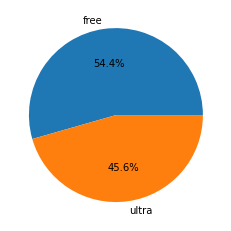

In [ ]:
#и построим круговую диаграмму
vals = [835, 699]
labels = ['free', 'ultra']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')

plt.show()

54,4% пользователей пользуется бесплатным тарифом, в то время как подпиской пользуются 45,6%.

#### Возраст пользователей

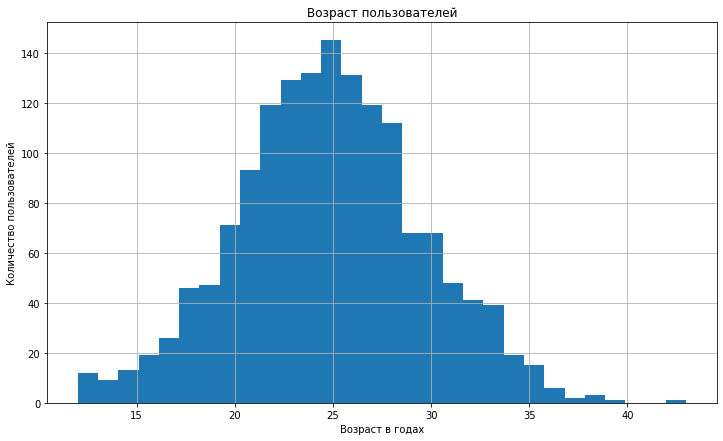

In [ ]:
users['age'].hist(bins=30, figsize=(12, 7)) #построим гистограмму для столбца age с возрастом пользователей датафрейма users
plt.title('Возраст пользователей')
plt.xlabel('Возраст в годах')
plt.ylabel('Количество пользователей')
plt.show()

In [ ]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Чаще всего самокатами пользуются люди в возрасте от 21 до 28 лет, пик приходится на 25-летних пользователей. Меньше всего пользователей в возрасте до 15 и старше 35 лет.

#### Расстояние, которое пользователь преодолел за одну поездку

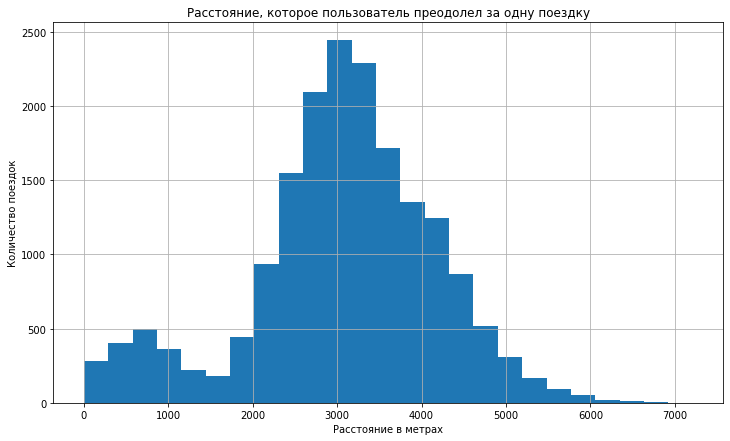

In [ ]:
rides['distance'].hist(bins=25, figsize=(12, 7)) #построим гистограмму для столбца distance с расстоянием поездки датафрейма rides
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Чаще всего пользователи совершают поездки на расстояние около 3 км - таких пользователей более 2400. Также есть небольшой всплеск в районе коротких поездок на 600-800 м. Можно предположить, что это объясняется тем, что самокаты чаще всего берут для двух целей: чтобы по-быстрому куда-то доехать (работа, учёба, метро) - это поездки до 1 км, - и для прогулок - это поездки в районе 3 км. Реже всего пользователи проезжают 6 и более км.

#### Продолжительность поездок

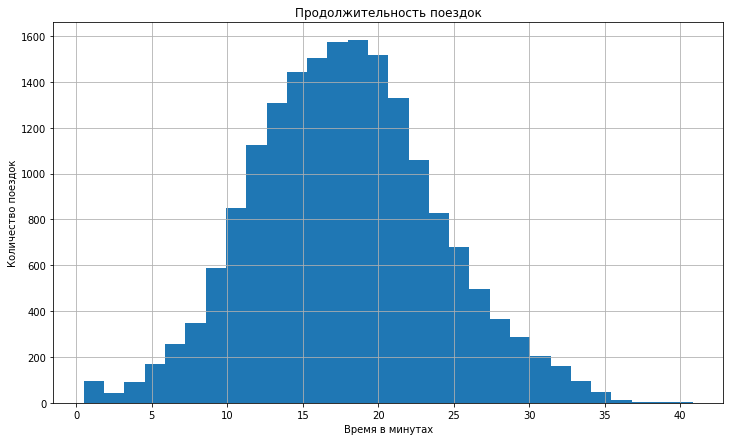

In [ ]:
rides['duration'].hist(bins=30, figsize=(12, 7)) #построим гистограмму для столбца duration со временем поездки датафрейма rides
plt.title('Продолжительность поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.show()

Большинство поездок длятся от 15 до 20 минут. Реже всего самокаты берут на более длительные поездки более 30 минут.

**Вывод:** мы визуализировали и изучили общую информацию о пользователях и поездках:
- чаще всего самокатами пользуются в Пятигорске (встречается в датафрейме 219 раз), Екатеринбурге и Ростове-на-Дону (встречаются 204 и 198 раз соответственно), наименьшей популярностью сервис пользуется в Москве (168 вхождений).;
- 54,4% пользователей пользуется бесплатным тарифом, в то время как подпиской пользуются 45,6%;
- чаще всего самокатами пользуются люди в возрасте от 21 до 28 лет (пик приходится на 25-летних пользователей), реже всего - пользователи в возрасте до 15 и старше 35 лет;
- чаще всего пользователи совершают поездки на расстояние около 3 км - таких пользователей более 2400, также есть небольшой всплеск в районе коротких поездок на 600-800 м. Реже всего пользователи проезжают 6 и более км;
- большинство поездок длятся от 15 до 20 минут, реже всего самокаты берут на поездки более 30 минут.

### Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [ ]:
#сначала объединим датафреймы users и rides по столбцу user_id
data = users.merge(rides, on='user_id', how='left')

#затем объединим получившийся датафрейм и subscriptions по столбцу subscription_type
data_merged = data.merge(subscriptions, on='subscription_type', how='left')
data_merged.head(15) #выведем первые 15 строк получившегося датафрейм, чтобы убедиться, что объединение прошло успешно

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [ ]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Все строки и столбцы трёх исходных датафреймов на месте - можем двигаться дальше.

#### Создадим датафреймы с данными о пользователях без подписки и с подпиской.

In [ ]:
#создадим датафрейм с данными о пользователях без подписки

#выбираем из объединённого датафрейма только строчки без подписки
sub_free = data_merged.query('subscription_type == "free"')

sub_free.query('subscription_type == "ultra"') #проверяем, что в новый датафрейм sub_free не попали строчки с платной подпиской

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee


In [ ]:
#создадим датафрейм с данными о пользователях с подпиской

#выбираем из объединённого датафрейма только строчки с платной подпиской
sub_ultra = data_merged.query('subscription_type == "ultra"')
sub_ultra.query('subscription_type == "free"') #проверяем, что в новый датафрейм sub_ultra не попали строчки с бесплатным тарифом

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee


#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

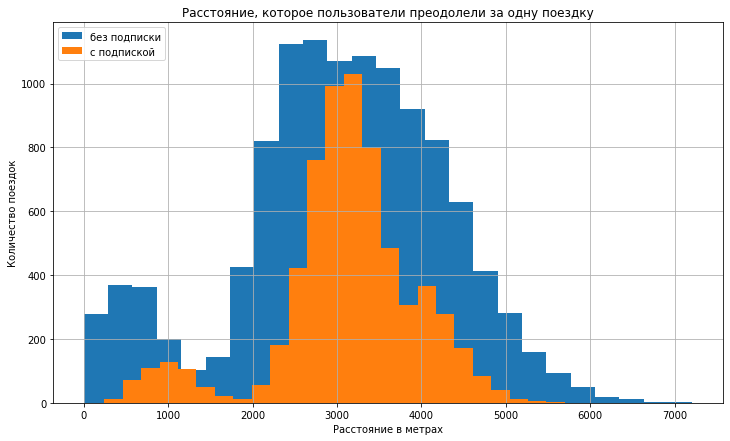

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.hist(sub_free['distance'], bins=25, label='без подписки')
plt.hist(sub_ultra['distance'], bins=25, label='с подпиской')
plt.title('Расстояние, которое пользователи преодолели за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.legend(loc='upper left')
plt.show()

В среднем, пользователи без подписки чаще совершают поездки на 2,5-2,7 км и 3,5-3,7 км, в то время как пользователи с подпиской чаще проезжают 2,7-3,5 км. Также пользователи без подписки совершают больше поездок на расстояния меньше 1 км и больше 5 км.

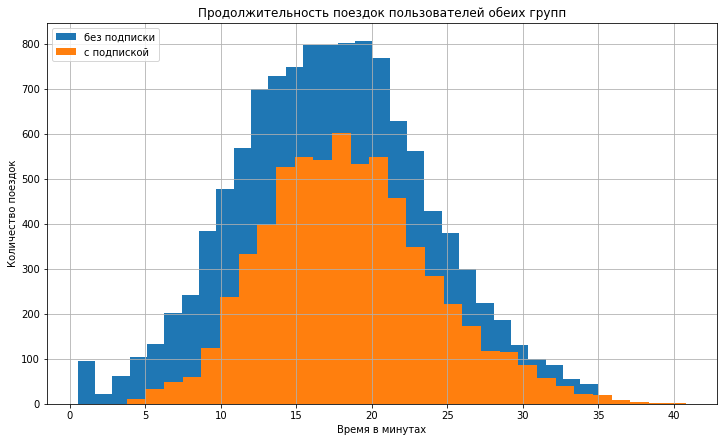

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.hist(sub_free['duration'], bins=30, label='без подписки')
plt.hist(sub_ultra['duration'], bins=30, label='с подпиской')
plt.title('Продолжительность поездок пользователей обеих групп')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.legend(loc='upper left')
plt.show()

Для обеих категорий пользователей самое популярная длительность поездки - 15-20 минут. В то же время пользователи без подписки чаще берут самокат на короткий срок до 5 минут, а пользователи с подпиской - на длительные поездки больше 35 минут.

**Вывод:**
- мы объединили данные о пользователях, поездках и подписках в один датафрейм;
- создали датафреймы с данными о пользователях без подписки и с подпиской;
- визуализировали и изучили информацию о расстоянии и времени поездок для пользователей обеих категорий и выяснили, что:
    + пользователи без подписки чаще совершают поездки на 2,5-2,7 км и 3,5-3,7 км, в то время как пользователи с подпиской чаще проезжают 2,7-3,5 км. Также пользователи без подписки совершают больше поездок на расстояния меньше 1 км и больше 5 км.
    + для обеих категорий пользователей самое популярная длительность поездки - 15-20 минут. В то же время пользователи без подписки чаще берут самокат на короткий срок до 5 минут, а пользователи с подпиской - на длительные поездки больше 35 минут.

### Шаг 5. Подсчёт выручки

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [ ]:
#в исходном датафрейме округляем длительность поездки до следующего целого значения
data_merged['duration'] = np.ceil(data_merged['duration'])

#создадим сводную таблицу на основе датафрейма с объединёнными данными с суммарным расстоянием и суммарным временем
data_agg = data_merged.pivot_table(index=['user_id', 'month', 'subscription_type'], values=['distance', 'duration'], aggfunc='sum')
data_agg.columns = ['sum_distance', 'sum_duration'] #переименуем столбцы для обозначения сумм. расстояния и длительности поездки

#добавим столбец с количеством поездок за каждый месяц для каждого пользователя
data_agg['rides_count'] = data_merged.groupby('user_id')['month'].value_counts()

#переведём тип подписки subscription_type из индекса в обычный столбец, чтобы в дальнейшем работать с ним
data_agg.reset_index(inplace= True , level = ['subscription_type'])

#создадим агрегированную таблицу с информацией о стоимости по тарифам
data_fees = data_merged.pivot_table(index=['user_id', 'month'], values=['minute_price', 'start_ride_price', 'subscription_fee'], aggfunc='first')
data_agg = data_agg.merge(data_fees, on=['user_id', 'month'], how='left') #и добавим её к data_agg

data_agg.head(15) #выведем первые 15 строк получившегося датафрейма

subscription_type  sum_distance  sum_duration  rides_count  \
user_id month                                                              
1       1                 ultra   7027.511294          42.0            2   
        4                 ultra    754.159807           7.0            1   
        8                 ultra   6723.470560          46.0            2   
        10                ultra   5809.911100          32.0            2   
        11                ultra   7003.499363          56.0            3   
        12                ultra   6751.629942          28.0            2   
2       3                 ultra  10187.723006          63.0            3   
        4                 ultra   6164.381824          40.0            2   
        6                 ultra   3255.338202          14.0            1   
        7                 ultra   6780.722964          48.0            2   
        8                 ultra    923.007439           7.0            1   
        10                ultra   2824.636598          19.0            1   
        12                ultra   3828.248580          12.0            1   
3       1                 ultra   3061.777147          13.0            1   
        2                 ultra   5421.152016          39.0            2   

               minute_price  start_ride_price  subscription_fee  
user_id month                                                    
1       1                 6                 0               199  
        4                 6                 0               199  
        8                 6                 0               199  
        10                6                 0               199  
        11                6                 0               199  
        12                6                 0               199  
2       3                 6                 0               199  
        4                 6                 0               199  
        6                 6                 0               199  
        7                 6                 0               199  
        8                 6                 0               199  
        10                6                 0               199  
        12                6                 0               199  
3       1                 6                 0               199  
        2                 6                 0               199

#### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [ ]:
#создадим функцию, которая подсчитывает выручку для всех типов подписки:
#стоимость подписки + стоимость начала поездки*кол-во поездок + сумм. длительность поездок за месяц*стоимость минуты поездки
def revenue_func(row):
    return row['subscription_fee'] + row['start_ride_price']*row['rides_count'] + row['sum_duration']*row['minute_price']

#применяем получившуюся функцию к датафрейму, чтобы получить столбец с помесячной выручкой
data_agg['revenue'] = data_agg.apply(revenue_func, axis=1)
data_agg.head(15) #выводим первые 15 строк обновлённого датафрейма на экран

subscription_type  sum_distance  sum_duration  rides_count  \
user_id month                                                              
1       1                 ultra   7027.511294          42.0            2   
        4                 ultra    754.159807           7.0            1   
        8                 ultra   6723.470560          46.0            2   
        10                ultra   5809.911100          32.0            2   
        11                ultra   7003.499363          56.0            3   
        12                ultra   6751.629942          28.0            2   
2       3                 ultra  10187.723006          63.0            3   
        4                 ultra   6164.381824          40.0            2   
        6                 ultra   3255.338202          14.0            1   
        7                 ultra   6780.722964          48.0            2   
        8                 ultra    923.007439           7.0            1   
        10                ultra   2824.636598          19.0            1   
        12                ultra   3828.248580          12.0            1   
3       1                 ultra   3061.777147          13.0            1   
        2                 ultra   5421.152016          39.0            2   

               minute_price  start_ride_price  subscription_fee  revenue  
user_id month                                                             
1       1                 6                 0               199    451.0  
        4                 6                 0               199    241.0  
        8                 6                 0               199    475.0  
        10                6                 0               199    391.0  
        11                6                 0               199    535.0  
        12                6                 0               199    367.0  
2       3                 6                 0               199    577.0  
        4                 6                 0               199    439.0  
        6                 6                 0               199    283.0  
        7                 6                 0               199    487.0  
        8                 6                 0               199    241.0  
        10                6                 0               199    313.0  
        12                6                 0               199    271.0  
3       1                 6                 0               199    277.0  
        2                 6                 0               199    433.0

**Вывод:** Мы подсчитали помесячную выручку, которую принёс каждый пользователь. Для этого мы подсчитали суммарные время и расстояние поездок за каждый месяц, а также их количество, а затем рассчитали выручку с помощью функции.   

### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. В этом шаге мы проверим несколько гипотез, чтобы выяснить несколько важных моментов о пользователях с подпиской и без неё.

#### Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Сформулируем гипотезы:
    
H0 - Пользователи с подпиской тратят на поездки столько же времени, сколько и пользователи без подписки.

H1 - Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

In [ ]:
alpha = 0.05 #задаём уровень значимости

sub_total = sub_ultra['duration'] #длительность поездок пользователей с подпиской
free_total = sub_free['duration'] #длительность поездок пользователей без подписки

#проводим ttest, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(sub_total, free_total, alternative='greater')

print(f'p-value: {results.pvalue}')

print('Средняя продолжительность поездок пользователей без подписки:', sub_free['duration'].mean())
print('Средняя продолжительность поездок пользователей с подпиской:', sub_ultra['duration'].mean())

#проверяем p-value
if results.pvalue < alpha:
   print('Отвергаем нулевую гипотезу')
else:
   print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Средняя продолжительность поездок пользователей без подписки: 17.39090929866399
Средняя продолжительность поездок пользователей с подпиской: 18.54198516280583
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу в пользу альтернативной - пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформулируем гипотезы:

H0 - Пользователи с подпиской в среднем проезжают 3130 метров.

H1 - Пользователи с подпиской в среднем проезжают больше 3130 метров.

In [ ]:
dist = sub_ultra['distance'] #расстояние поездок пользователей с подпиской

optimal_dist = 3130 #оптимальное расстояние одной поездки

alpha = 0.05 #задаём уровень значимости

#проводим ttest, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_1samp(dist, optimal_dist, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
   print('Отвергаем нулевую гипотезу')
else:
   print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Мы придерживаемся нулевой гипотезы: пользователи с подпиской в среднем проезжают около 3130 метров и не превышают это значение.

#### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сформиулируем гипотезы:

H0 - Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

H1 - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [ ]:
sub_revenue = data_agg.query('subscription_type == "ultra"')['revenue'] #помесячная выручка пользователей с подпиской
free_revenue = data_agg.query('subscription_type == "free"')['revenue'] #помесячная выручка пользователей без подписки

alpha = 0.05 #задаём уровень значимости

#проводим ttest, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(sub_revenue, free_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')
print('Средняя помесячная выручка от пользователей без подписки:', data_agg.query('subscription_type == "free"')['revenue'].mean())
print('Средняя помесячная выручка от пользователей с подпиской:', data_agg.query('subscription_type == "ultra"')['revenue'].mean())

# проверяем p-value
if results.pvalue < alpha:
   print('Отвергаем нулевую гипотезу')
else:
   print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Средняя помесячная выручка от пользователей без подписки: 328.6413651073845
Средняя помесячная выручка от пользователей с подпиской: 362.7921906022502
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу в пользу альтернативной - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

В этом случае выборки будут парными (зависимыми), поэтому для проверки этой гипотезы нам понадобится метод scipy.stats.ttest_rel().

**Вывод:** мы проверили несколько гипотез и выяснили, что:
- пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки;
- пользователи с подпиской в среднем проезжают около 3130 метров и не превышают это значение;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

В целом, можно сказать, что для компании более "выгодны" пользователи, которые пользуются подпиской.

### Вывод

Мы провели исследование на основе данных популярного сервиса аренды самокатов GoFast.

Мы провели предобработку данных: заменили тип некоторых данных для удобства работы, удалили явные дубликаты, объединили несколько датафреймов, а также добавили несколько столбцов для удобства исследования.

Мы построили ряд гистограмм и на их основе сделали следующие **выводы**:

1) Чаще всего самокатами пользуются в Пятигорске (встречается в датафрейме 219 раз), Екатеринбурге и Ростове-на-Дону (встречаются 204 и 198 раз соответственно), наименьшей популярностью сервис пользуется в Москве (168 вхождений).

2) 54,4% пользователей пользуется бесплатным тарифом, в то время как подпиской пользуются 45,6%.

3) Чаще всего самокатами пользуются люди в возрасте от 21 до 28 лет (пик приходится на 25-летних пользователей), реже всего - пользователи в возрасте до 15 и старше 35 лет.

4) Чаще всего пользователи совершают поездки на расстояние около 3 км - таких пользователей более 2400, также есть небольшой всплеск в районе коротких поездок на 600-800 м. Реже всего пользователи проезжают 6 и более км.

5) Большинство поездок длятся от 15 до 20 минут, реже всего самокаты берут на поездки более 30 минут.

6) Пользователи без подписки чаще совершают поездки на 2,5-2,7 км и 3,5-3,7 км, в то время как пользователи с подпиской чаще проезжают 2,7-3,5 км. Также пользователи без подписки совершают больше поездок на расстояния меньше 1 км и больше 5 км.

7) Для обеих категорий пользователей самое популярная длительность поездки - 15-20 минут. В то же время пользователи без подписки чаще берут самокат на короткий срок до 5 минут, а пользователи с подпиской - на длительные поездки больше 35 минут.

Мы также проверили несколько гипотез и **выяснили**, что:

1) Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

2) Пользователи с подпиской в среднем проезжают около 3130 метров - оптимальное расстояние с точки зрения износа самоката - и не превышают это значение.

3) Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

В целом, можно сказать, что для компании более "выгодны" пользователи, которые пользуются подпиской.

**Рекомендация для сервиса:** проводить рекламные кампании и акции для увеличения количества пользователей с подпиской для увеличения прибыли.